In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the dataset

In [3]:

df = pd.read_csv('E:/Final year/SeoulBikeData.csv', encoding="unicode_escape")
df.shape


(8760, 14)

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
## data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [7]:
## check nul value
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df['Date'])

df["weekday"] = df["Date"].dt.day_name()
df["Day"] =  df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] =  df["Date"].dt.year

df.drop("Date",axis=1,inplace=True)

c:\Users\LENOVO\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LENOVO\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LENOVO\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LENOVO\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format o

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [10]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


## EDA

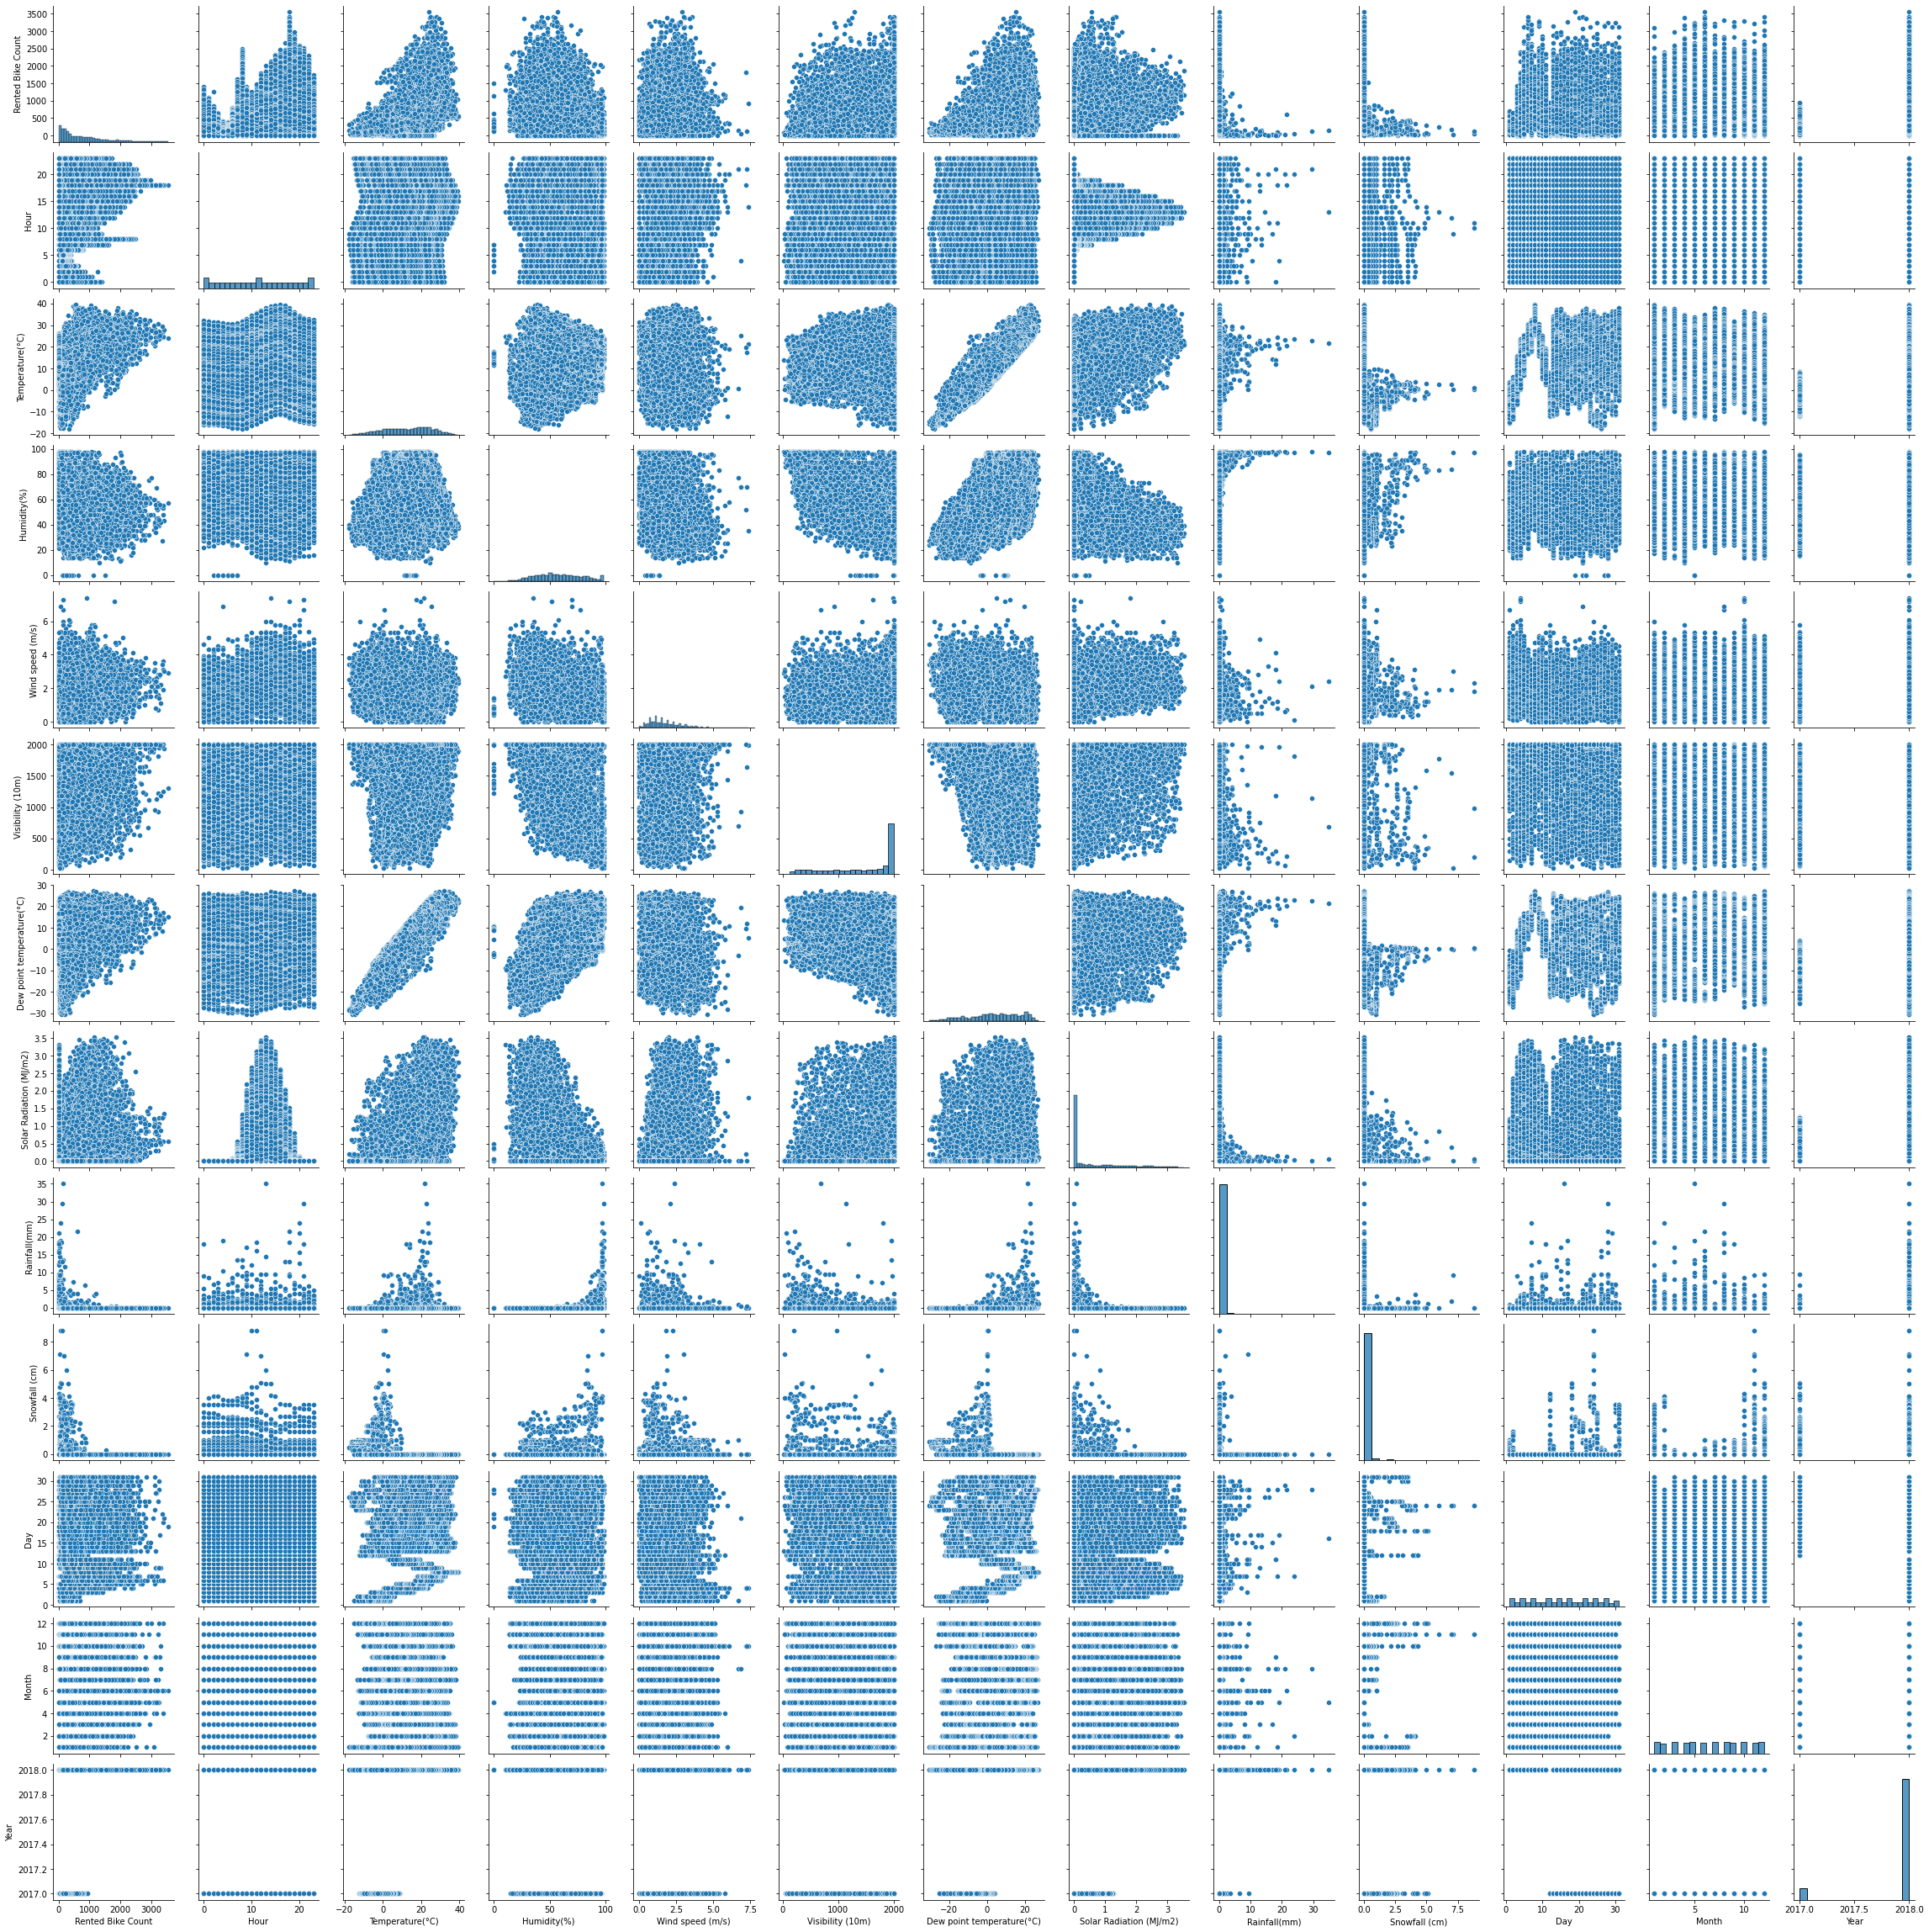

In [11]:
sns.pairplot(df)

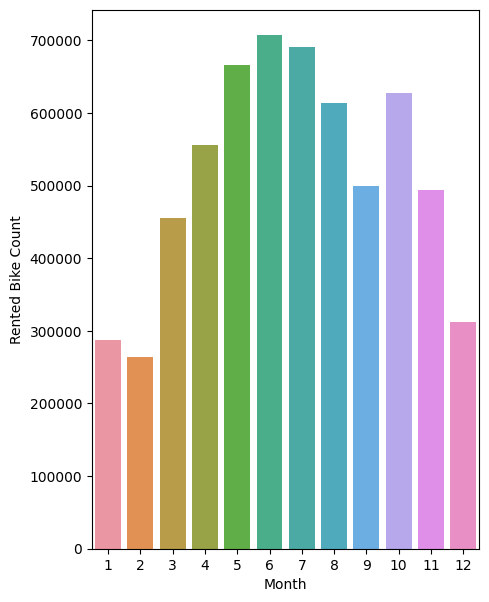

In [12]:
plt.figure(figsize=(5, 7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.show()

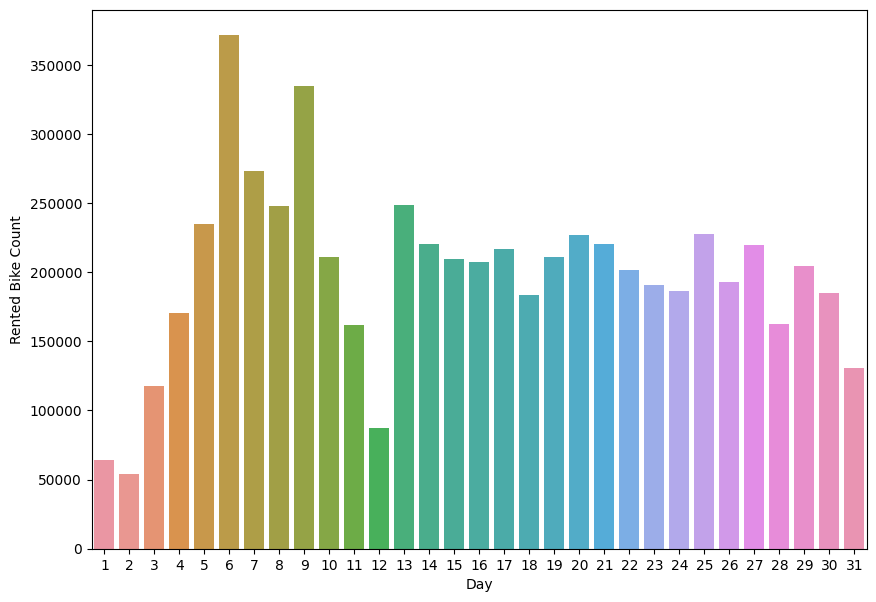

In [13]:
plt.figure(figsize=(10, 7))
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.show()

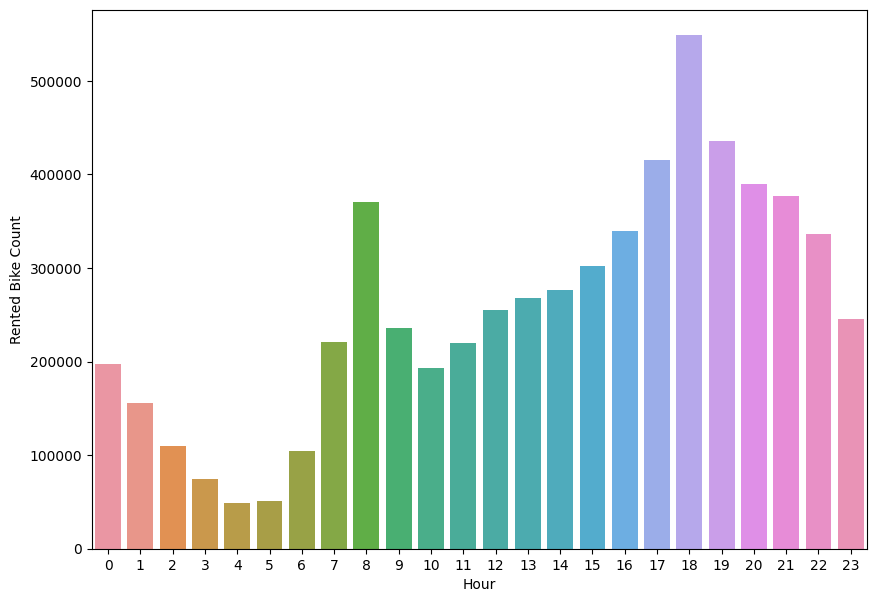

In [14]:
plt.figure(figsize=(10, 7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)
plt.show()

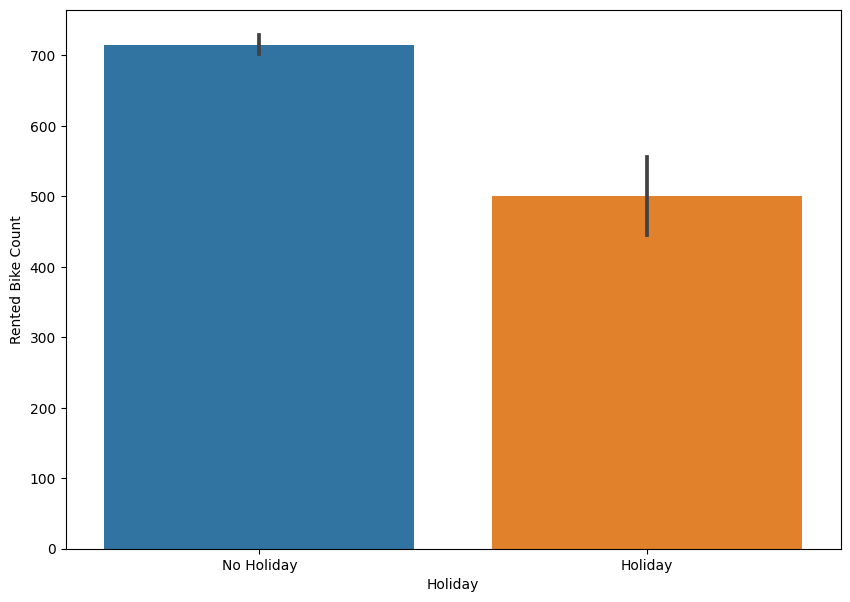

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday",y="Rented Bike Count", data=df)
plt.show()

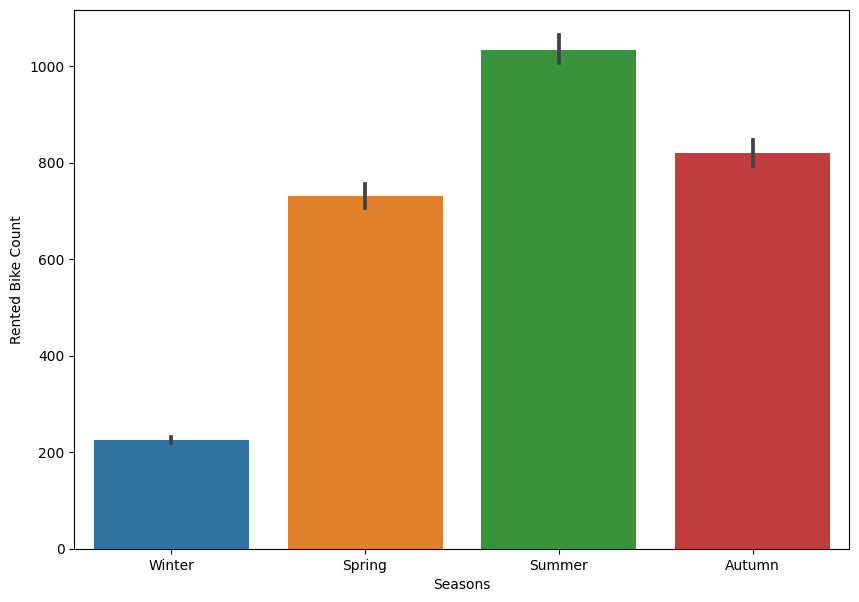

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons",y="Rented Bike Count", data=df)
plt.show()

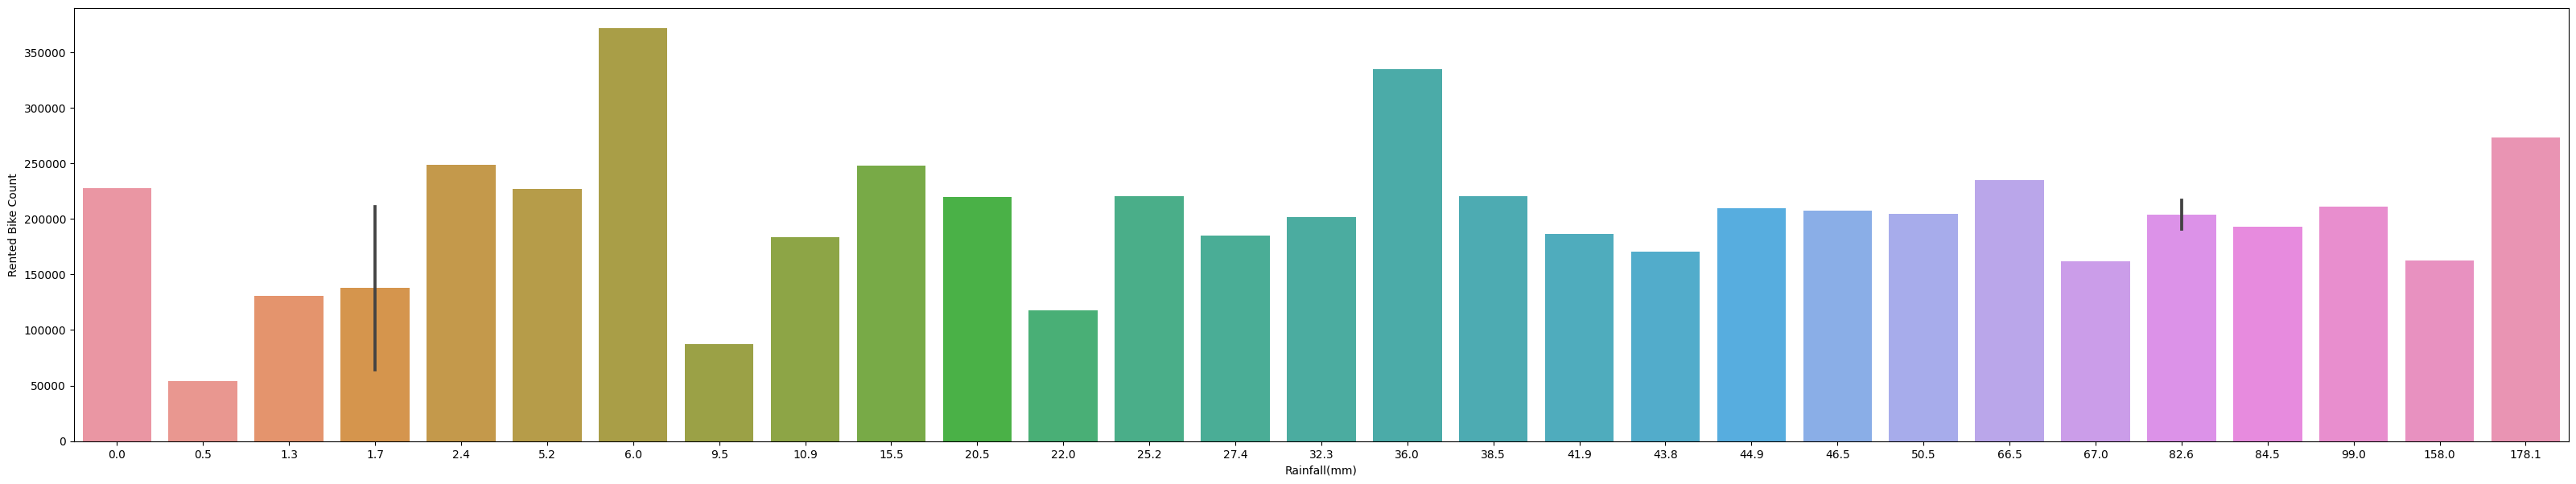

In [17]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=Day)
plt.show()

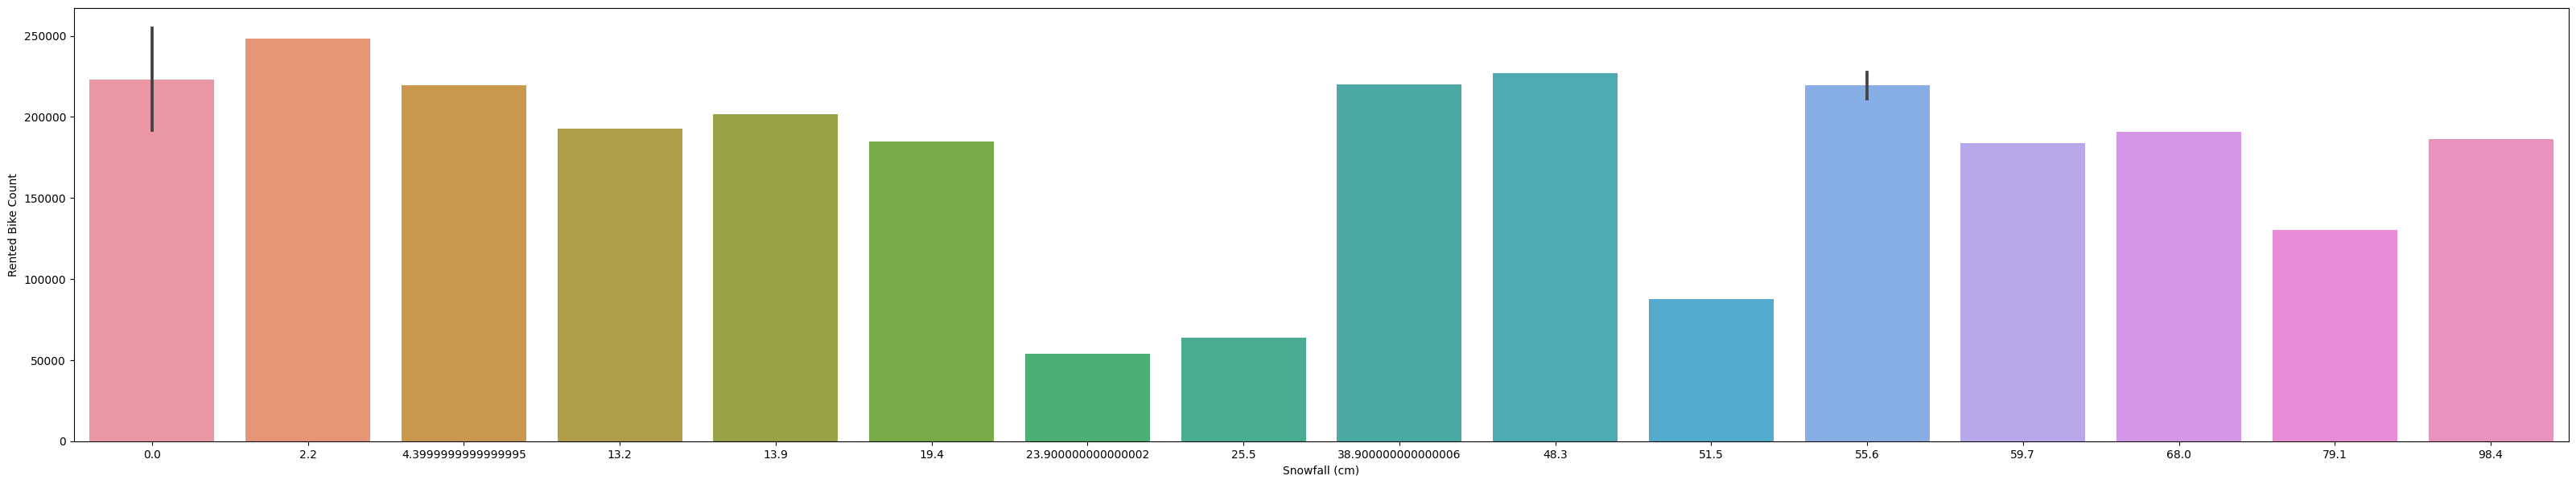

In [18]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)",y="Rented Bike Count",data=Day)
plt.show()

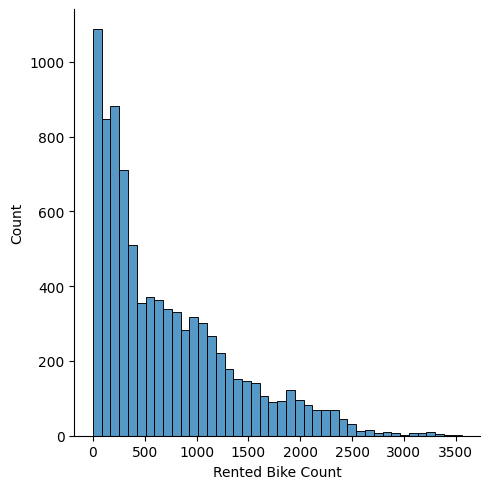

In [19]:
sns.displot(df["Rented Bike Count"])

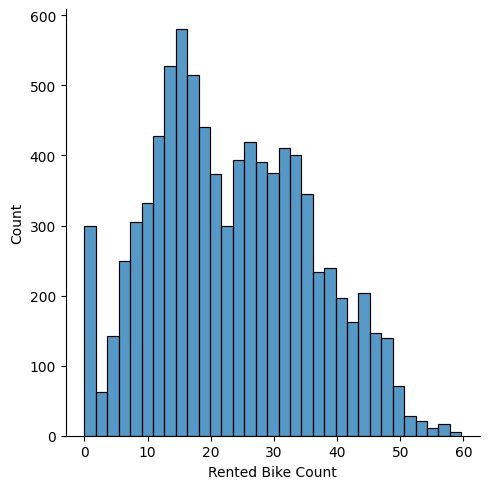

In [20]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

## Skewed Data

In [21]:
df.skew().sort_values(ascending=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_65968\2280407189.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=True)


Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Remove Multicollimearity

In [22]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,4.684885e-02,7.086107e-02,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,4.206322e-16,1.036729e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,8.090791e-02,4.968327e-02,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,7.047359e-03,4.779778e-02,3.592468e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-6.123440e-02,-8.206909e-02,-3.780878e-03
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.068595e-01,7.788783e-02,5.238110e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.970777e-02,6.510073e-02,3.363497e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.445555e-03,-3.041240e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.199827e-02,-2.279368e-02,2.752192e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.014355e-01,5.475846e-02,-2.064178e-01


<AxesSubplot:>

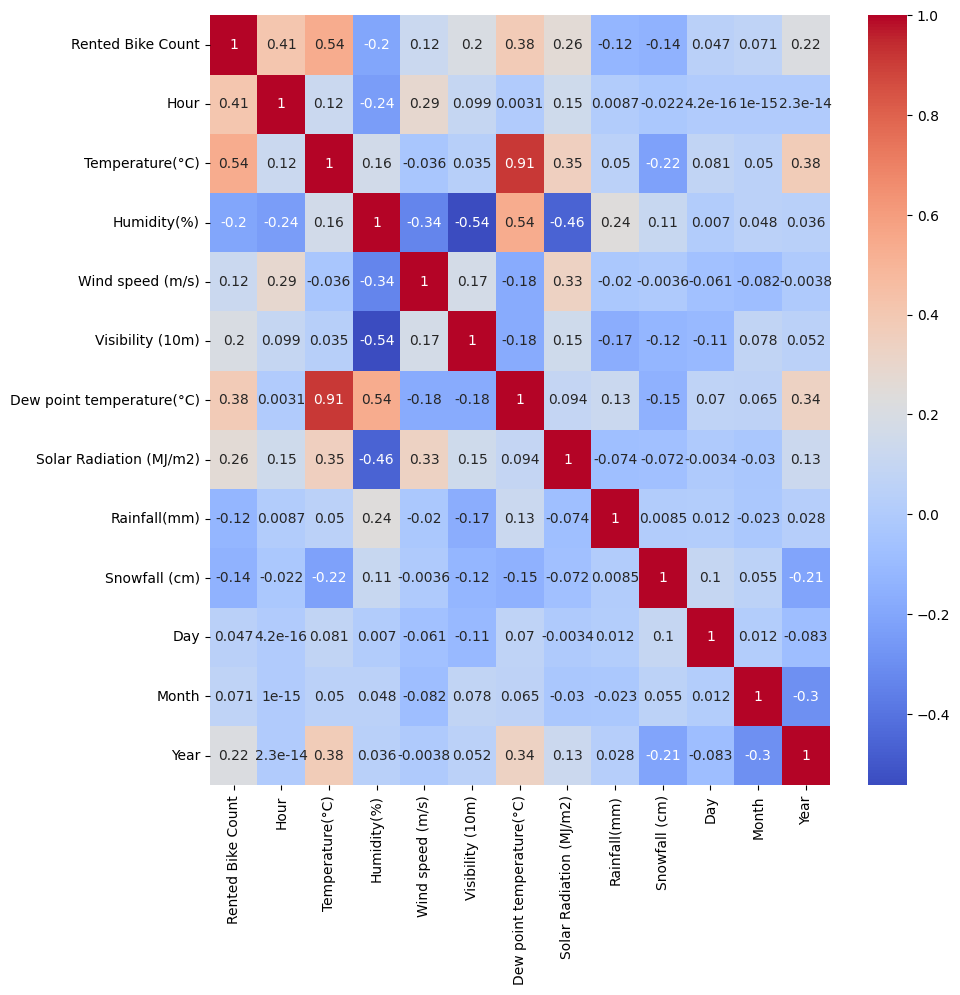

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [24]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    
    return vif

In [25]:
not_for_vif = ["Day","Month","Year", "Rented Bike Count"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif ]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [26]:
# for numerice format
df[[i for i in df.describe().columns if i not in not_for_vif ]]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [27]:
not_for_vif = ["Day","Month","Year", "Rented Bike Count","Dew point temperature(°C)"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif ]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [28]:
df.drop(["Dew point temperature(°C)"],axis=1,inplace=True)

## Encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [30]:
cat_features = ["Seasons","Holiday","weekday","Functioning Day"]

In [31]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [32]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [33]:
df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [34]:
df["weekday"].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: weekday, dtype: int64

In [35]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0,"Yes":1})

In [36]:
df_season = pd.get_dummies(df["Seasons"],drop_first = True)
df_weekday = pd.get_dummies(df["weekday"],drop_first=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [38]:
df = pd.concat([df,df_season,df_weekday],axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [40]:
df.drop(["Seasons","weekday"],axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [42]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0


In [43]:
df.shape

(8760, 23)

## Split Data for Training & Testing

In [44]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7008, 22)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 22)
Shape of y_test :  (1752,)


### Scaling

In [45]:
sc =  StandardScaler()
sc.fit(X_train)

X_train =  sc.transform(X_train)
X_test =  sc.transform(X_test)

In [46]:
X_train[:2]

array([[ 1.51118219,  0.05556521, -2.10940521,  0.46658045,  0.92262892,
        -0.65681529, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -1.32928272,  1.58736786,  0.30459857,  1.74132735, -0.58152447,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
         2.4655198 , -0.41815465],
       [ 0.93371229,  1.00382241, -0.25185689,  1.82005277,  0.92262892,
         0.82386154, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -1.10164234,  1.58736786,  0.30459857, -0.57427456,  1.71961809,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465,  2.45255275,
        -0.40559398, -0.41815465]])

In [47]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56787957e+01, 6.51341324e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.36986301e-01, 1.42551370e-01, 1.48829909e-01, 1.42551370e-01,
       1.41267123e-01, 1.48829909e-01])

In [48]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78578762e+00, 3.45640534e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.43832888e-01, 3.49614755e-01, 3.55920731e-01, 3.49614755e-01,
       3.48296889e-01, 3.55920731e-01])

## Training Ml Model
1. Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_test)

In [52]:
y_pred

array([  82.875826  ,  976.47642256, 1409.37670678, ..., 1544.96839026,
        504.51433769,  803.78036478])

### Model Evaluation

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
MSE =  mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE =  mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")


MSE : 188944.76470240724
RMSE : 434.67777111603857
MAE : 330.9044419713851
R2 : 0.5371041582058085


Creating a function , so that we can use it for different ml model, for the prediction

In [55]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    
    print(f"{model_name} : ['MSE': {round(MSE,3)}, 'RMSE':{round(RMSE,3)},'MAE': {round(MAE,3)}, 'R2': {round(R2,3)}]")

In [56]:
get_metrics(y_test,y_pred, "LinearRegression")

LinearRegression : ['MSE': 188944.765, 'RMSE':434.678,'MAE': 330.904, 'R2': 0.537]


### Train Multiple Models

In [57]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [58]:
rir =  Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_ploy = poly.fit_transform(X_train)
X_test_ploy = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_ploy,y_train)
y_pred_poly = poly_r.predict(X_test_ploy)

svr = SVR().fit(X_train,y_train) 
y_pred_svr = svr.predict(X_test)

knnr= KNeighborsRegressor().fit(X_train,y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [59]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr,"KNNR")
get_metrics(y_test, y_pred_dtr,"DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge : ['MSE': 188944.168, 'RMSE':434.677,'MAE': 330.898, 'R2': 0.537]
Lasso : ['MSE': 188895.35, 'RMSE':434.621,'MAE': 330.551, 'R2': 0.537]
PolynomialFeatures : ['MSE': 125295.085, 'RMSE':353.97,'MAE': 248.182, 'R2': 0.693]
SVR : ['MSE': 318011.649, 'RMSE':563.925,'MAE': 386.276, 'R2': 0.221]
KNNR : ['MSE': 102739.999, 'RMSE':320.531,'MAE': 210.222, 'R2': 0.748]
DecisionTreeRegressor : ['MSE': 91115.696, 'RMSE':301.854,'MAE': 167.071, 'R2': 0.777]
RandomForestRegressor : ['MSE': 39698.602, 'RMSE':199.245,'MAE': 120.431, 'R2': 0.903]
XGBRegressor : ['MSE': 33799.328, 'RMSE':183.846,'MAE': 114.62, 'R2': 0.917]


### Visualise Model Prediction

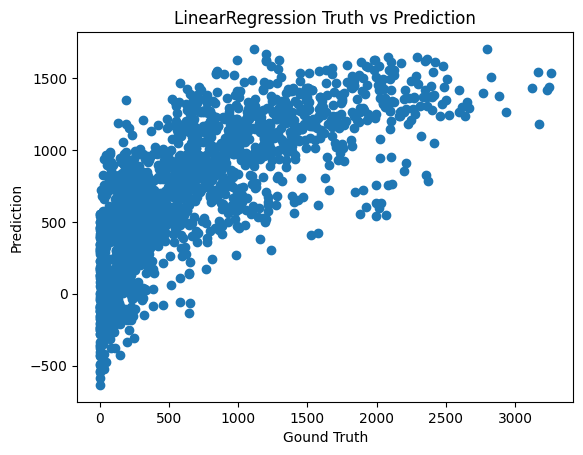

In [60]:
plt.scatter(y_test, y_pred)
plt.title("LinearRegression Truth vs Prediction")
plt.xlabel("Gound Truth")
plt.ylabel("Prediction")
plt.show()

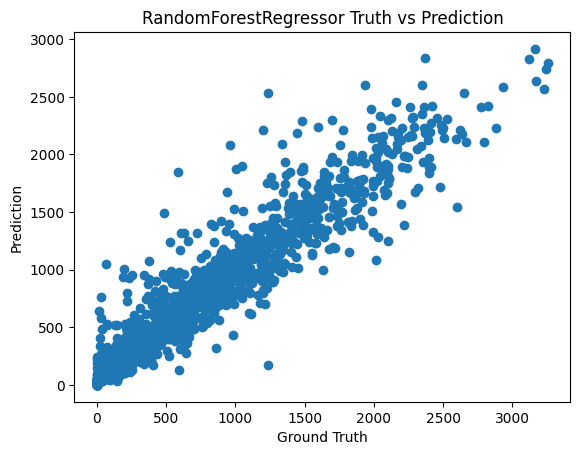

In [61]:
plt.scatter(y_test,y_pred_rfr)
plt.title("RandomForestRegressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

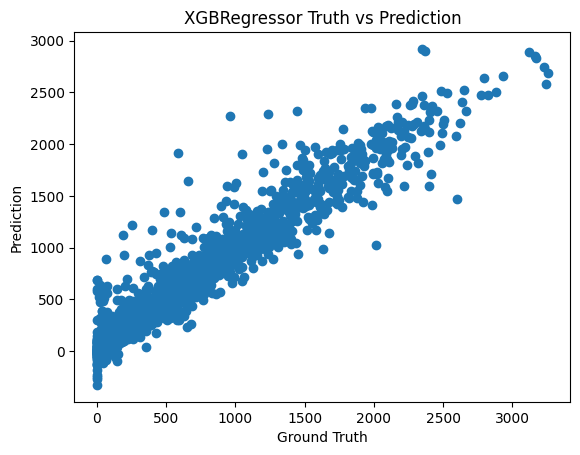

In [62]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGBRegressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

### Hyperparameter Tuning for Random Forest Regressor 

In [63]:
from sklearn.model_selection import RandomizedSearchCV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=10)]

#Number of features to consider at every split 
max_features =  ['auto','sqrt']

#maximum number of levels allowed in each decision tree 
max_depth =  [int(x) for x in  np.linspace(10,120, num=12)]

#Minimum number of samples required to split a node
min_samples_split =[2,5,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4] 

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [64]:
import time
start_time = time.time()

rf = RandomForestRegressor()
#Random search of parameters, using 3 fold cross validation
# search across 100 different combinations and use all available cross
rf_random =  RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)
# fit the random search model
rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to training using randomize search : ", time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Time taken to training using randomize search :  2550.2526502609253


In [65]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : ['MSE': 37287.946, 'RMSE':193.101,'MAE': 121.716, 'R2': 0.909]


In [66]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [67]:
rf_tuned = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf = 1,
 max_features= 'sqrt',
 max_depth = 120,
 bootstrap = False)
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor with Best Parameters")

RandomForestRegressor with Best Parameters : ['MSE': 37504.966, 'RMSE':193.662,'MAE': 121.719, 'R2': 0.908]


In [68]:
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = {'max_depth' : [3,5,6,10,15,20],
          'learning_rate':[0.01,0.1,0.2,0.3],
          'subsample':np.arange(0.5,1.0,0.1),
          'colsample_bytree':np.arange(0.4,1.0,0.1),
          'colsample_bylevel': np.arange(0.4,1.1,0.1),
          'n_estimators': [100,500,1000]}

xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator = xgbr,
                          param_distributions = params,
                          scoring = 'neg_mean_squared_error',
                          n_iter=25,
                          cv=5,
                          verbose=1)
rscv.fit(X_train, y_train)
y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test, y_pred_xgb_random,"XGBRegressor with Best Parameters")

print("Time taken to training using randomize search : ", time.time()-start_time)
print("Best parameters: ", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor with Best Parameters : ['MSE': 26811.676, 'RMSE':163.743,'MAE': 95.47, 'R2': 0.934]
Time taken to training using randomize search :  437.3029100894928
Best parameters:  {'subsample': 0.7999999999999999, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7}


In [69]:
xgbr = XGBRegressor(subsample=0.6,
                    n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.1,
                    colsample_bytree = 0.7,
                    colsample_bylevel = 0.4,
                    seed = 20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor with Best Parameters")

XGBRegressor with Best Parameters : ['MSE': 30438.946, 'RMSE':174.468,'MAE': 107.482, 'R2': 0.925]


In [70]:
xgbr = XGBRegressor(subsample=0.6,
                    n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.09,
                    colsample_bytree = 0.7,
                    colsample_bylevel = 0.4,
                    seed = 20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor with Best Parameters")

XGBRegressor with Best Parameters : ['MSE': 29552.044, 'RMSE':171.907,'MAE': 107.515, 'R2': 0.928]


### Save ML Best Model

In [72]:
import pickle 
import os 
dir = r"E:\Final year\models"
model_file_name = "xgboost_regressor_r2_0_928_v1.pkl"

model_file_path = os.path.join(dir,model_file_name)

pickle.dump(xgbr,open(model_file_path,"wb"))

In [73]:
X_test[0,:]

array([ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
       -1.21546253,  1.00873202,  0.30459857,  1.74132735, -0.58152447,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
       -0.40559398, -0.41815465])

In [74]:
X_test[1,:]

array([-0.65432992,  1.24504573,  0.23697162, -0.5001855 ,  0.56154562,
       -0.28664608, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        0.94712104,  0.14077827,  0.30459857, -0.57427456,  1.71961809,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
        2.4655198 , -0.41815465])

### Dump Scaling Parameters

In [76]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56787957e+01, 6.51341324e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.36986301e-01, 1.42551370e-01, 1.48829909e-01, 1.42551370e-01,
       1.41267123e-01, 1.48829909e-01])

In [77]:
sc_dump_path = r"E:\Final year\models\sc.pkl"

pickle.dump(sc, open(sc_dump_path,"wb"))